In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import datasets

import sys
sys.path.append('../')
from lib.processing_functions import convert_to_pandas

# Model evaluation

## Outline

Goal: Show how the performance of a trained scikit-learn estimator can be evaluated

Key topics:

- **Scorers and metric functions**: quantify the quality of a trained model 
- **Model persistence**: storing a trained estimator for future use

<img src="../images/example_workflow.png" style="display: block;margin-left: auto;margin-right: auto;width: 600px"/>

## Choice of performance metric

The performance metric should follow from your business case:

* Fraud detection: costly to check, optimize precision.
* Lead generation: don't miss opportunities, optimize recall.
* Loan default: get good expected revenue, optimize log loss.
* Call center prioritization: get good ordering, optimize ROC AUC.

Reality may break your metric: e.g. accuracy may be inflated for skewed data!

## Losses & scorers

- Loss or cost function: cost of being wrong -> lower is better
- Score function: score of the model -> higher is better

## Example metrics

### Regression metric: MSE

Mean squared error (MSE): loss function
 
$$MSE=\frac{1}{N}\sum_{i=1}^N\left(y_i-\hat{y}_i\right)^2$$

* Average squared differences between the observed values $y$ and the predictions $\hat{y}$.
* $e_i=y_i-\hat{y}_i$ is often referred to as the residual.

### Regression metric: $R^2$




Regression algorithms use by default an $R^2$ scoring method, the so-called explained variance score or coefficient of determination, calculated as

$$ R^2 = 1 - \frac{\mathrm{residual \, sum \,of \, squares}}{\mathrm{total \,sum \, of \, squares}} = 1 - \frac{ \lvert \lvert \mathrm{\mathbf{y_{test}}} - \mathrm{\mathbf{y_{pred}}} \rvert \rvert^2}{ \lvert \lvert \mathrm{\mathbf{y_{test}}} - \overline{\mathrm{\mathbf{y_{test}}}} \rvert \rvert^2} $$

whose highest score, attained after a perfect prediction, is 1. The figure below will help us to wrap our heads around what it is we're trying to calculate, where $f$ in the right figure corresponds to $y_{pred}$:

<img src="../images/r2.png" style="display: block;margin-left: auto;margin-right: auto;"/>
Source: https://commons.wikimedia.org/w/index.php?curid=11398293

The image on the left is the square of the distance from the test values to the average true value, while the image on the right is the square of the distance from the test values to the predicted values. The fraction is therefore the sum of the areas of the blue squares divided by the sum of the red squares, or a comparison of our prediction to a random guess. To minimize this fraction (and thus maximize the $R^2$ score), the goal is thus to minimize the size of the blue squares, i.e. predict a line which comes as close to the true values as possible.

Alternatively, $R^2$ can also be viewed as a normalized version of the MSE: 
$$R^2 = 1 - \frac{MSE}{Var(y)}$$

### Classification metric: confusion matrix

Compare our predictions with the ground truth:

<img src="../images/confusion_matrix.png" style="display: block;margin-left: auto;margin-right: auto;"/>

### Classification metrics: accuracy, precision, recall


Accuracy: fraction of labels that are correctly classified

$$A =\frac{TP + TN}{FP + FN + TP + TN}$$


Precision: fraction of positive predictions that are correct

$$P = \frac{TP}{FP + TP}$$ 

Recall: fraction of positive labels that are correctly classified 

$$R = \frac{TP}{TP + FN}$$ 

## Model evaluation in scikit-learn

Three approaches to model evaluation:

- **Estimator score method**: all estimators have a score method that applies a 'default' evaluation criterion (see estimator's documentation)
- **Scoring parameter**: tools that use cross-validation rely on an internal scoring strategy; the `scoring` parameter defines the model evaluation rules
- **Metric functions**: `sklearn.metrics` contains several functions for assessing prediction error for specific purposes

Next we will discuss the latter two approaches in more detail.

## Parameter `scoring`

Used in functions like `GridSearchCV` and `cross_val_score` and specifies the evaluation criterion used during cross-validation.

Scikit-learn allows two types of scorers:

- **common scorers**: the most commonly used scorers are passed as scoring parameter by name
- **custom scorers**: a custom scorer created using the `make_scorer` function may also be passed as scoring parameters

In [2]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import svm

clf = SVC()
X, y = convert_to_pandas(datasets.load_iris())
cross_val_score(clf, X, y, scoring='accuracy')

array([ 0.98039216,  0.96078431,  0.97916667])

### Common scorers

An overview of the common scorers and their related metric functions:

<table border="1">
<colgroup>
<col width="40%" />
<col width="60%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Scoring</th>
<th class="head">Function</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td><strong>Classification</strong></td>
<td>&nbsp;</td>
</tr>
<tr class="row-odd"><td>&#8216;accuracy&#8217;</td>
<td><a class="reference internal" href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score" title="sklearn.metrics.accuracy_score"><tt class="xref py py-func docutils literal"><span class="pre">metrics.accuracy_score</span></tt></a></td>
</tr>
<tr class="row-even"><td>&#8216;average_precision&#8217;</td>
<td><a class="reference internal" href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score" title="sklearn.metrics.average_precision_score"><tt class="xref py py-func docutils literal"><span class="pre">metrics.average_precision_score</span></tt></a></td>
</tr>
<tr class="row-odd"><td>&#8216;f1&#8217;</td>
<td><a class="reference internal" href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><tt class="xref py py-func docutils literal"><span class="pre">metrics.f1_score</span></tt></a></td>
</tr>
<tr class="row-even"><td>&#8216;f1_micro&#8217;</td>
<td><a class="reference internal" href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><tt class="xref py py-func docutils literal"><span class="pre">metrics.f1_score</span></tt></a></td>
</tr>
<tr class="row-odd"><td>&#8216;f1_macro&#8217;</td>
<td><a class="reference internal" href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><tt class="xref py py-func docutils literal"><span class="pre">metrics.f1_score</span></tt></a></td>
</tr>
<tr class="row-even"><td>&#8216;f1_weighted&#8217;</td>
<td><a class="reference internal" href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><tt class="xref py py-func docutils literal"><span class="pre">metrics.f1_score</span></tt></a></td>
</tr>
<tr class="row-odd"><td>&#8216;f1_samples&#8217;</td>
<td><a class="reference internal" href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><tt class="xref py py-func docutils literal"><span class="pre">metrics.f1_score</span></tt></a></td>
</tr>
<tr class="row-even"><td>&#8216;log_loss&#8217;</td>
<td><a class="reference internal" href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss" title="sklearn.metrics.log_loss"><tt class="xref py py-func docutils literal"><span class="pre">metrics.log_loss</span></tt></a></td>
</tr>
<tr class="row-odd"><td>&#8216;precision&#8217; etc.</td>
<td><a class="reference internal" href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score" title="sklearn.metrics.precision_score"><tt class="xref py py-func docutils literal"><span class="pre">metrics.precision_score</span></tt></a></td>
</tr>
<tr class="row-even"><td>&#8216;recall&#8217; etc.</td>
<td><a class="reference internal" href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score" title="sklearn.metrics.recall_score"><tt class="xref py py-func docutils literal"><span class="pre">metrics.recall_score</span></tt></a></td>
</tr>
<tr class="row-odd"><td>&#8216;roc_auc&#8217;</td>
<td><a class="reference internal" href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><tt class="xref py py-func docutils literal"><span class="pre">metrics.roc_auc_score</span></tt></a></td>
</tr>
</tbody>
</table>

<table border="1">
<colgroup>
<col width="40%" />
<col width="60%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Scoring</th>
<th class="head">Function</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td><strong>Clustering</strong></td>
<td>&nbsp;</td>
</tr>
<tr class="row-odd"><td>&#8216;adjusted_rand_score&#8217;</td>
<td><a class="reference internal" href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score" title="sklearn.metrics.adjusted_rand_score"><tt class="xref py py-func docutils literal"><span class="pre">metrics.adjusted_rand_score</span></tt></a></td>
</tr>
<tr class="row-even"><td><strong>Regression</strong></td>
<td>&nbsp;</td>
</tr>
<tr class="row-odd"><td>&#8216;mean_absolute_error&#8217;</td>
<td><a class="reference internal" href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error" title="sklearn.metrics.mean_absolute_error"><tt class="xref py py-func docutils literal"><span class="pre">metrics.mean_absolute_error</span></tt></a></td>
</tr>
<tr class="row-even"><td>&#8216;mean_squared_error&#8217;</td>
<td><a class="reference internal" href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error" title="sklearn.metrics.mean_squared_error"><tt class="xref py py-func docutils literal"><span class="pre">metrics.mean_squared_error</span></tt></a></td>
</tr>
<tr class="row-odd"><td>&#8216;median_absolute_error&#8217;</td>
<td><a class="reference internal" href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.median_absolute_error.html#sklearn.metrics.median_absolute_error" title="sklearn.metrics.median_absolute_error"><tt class="xref py py-func docutils literal"><span class="pre">metrics.median_absolute_error</span></tt></a></td>
</tr>
<tr class="row-even"><td>&#8216;r2&#8217;</td>
<td><a class="reference internal" href="http://scikit-learn.org/stable/modules/generateds/klearn.metrics.r2_score.html#sklearn.metrics.r2_score" title="sklearn.metrics.r2_score"><tt class="xref py py-func docutils literal"><span class="pre">metrics.r2_score</span></tt></a></td>
</tr>
</tbody>
</table>


##  Metric functions

Functions that quantify prediction quality given the ground truth.

- **score functions**: metrics that end with `_score` and return a value to maximize, *the higher the better*
- **loss function**: metrics that end with `_error` or `_loss` and return a value to minimize, *the lower the better*

The the following type of metrics are available for the various different machine learning tasks:

- Classification metrics
- Multilabel ranking metrics
- Regression metrics
- Clustering metrics

## Classification metrics example

Use the predicted labels to compute the recall, precision, accuracy and f1-score

In [3]:
from sklearn import metrics

y_true = np.array([1, 0, 0, 0, 1, 0, 1])
y_preds = [[1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1]]

for y_pred in y_preds:
    print(f'For the predictions: {y_pred}')
    recall = metrics.recall_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred)
    acc = metrics.accuracy_score(y_true, y_pred)
    f1 = metrics.f1_score(y_true, y_pred)
    print("Recall: {:1.2f}".format(recall))
    print("Precision: {:1.2f}".format(precision))
    print("Accuracy score: {:1.2f}".format(acc))
    print("f1 score: {:1.2f}".format(f1))
    print()

For the predictions: [1, 0, 0, 0, 0, 0, 0]
Recall: 0.33
Precision: 1.00
Accuracy score: 0.71
f1 score: 0.50

For the predictions: [1, 1, 1, 1, 1, 1, 1]
Recall: 1.00
Precision: 0.43
Accuracy score: 0.43
f1 score: 0.60



## Regression metrics example

Compare the performance of the `mean_absolute_error` and `median_absolute_error` on `y` and `y_pred` values below and visualize both metrices and the absolute prediction errors:

In [4]:
from sklearn.metrics import mean_absolute_error, median_absolute_error

y = np.array([0.5, 1.9, 3.5, 1, 6.2, 6.9])
y_pred= np.array([1, 2.1, 3.4 ,3.9 , 6, 7.2])
n = len(y)

mean_error = mean_absolute_error(y, y_pred)
median_error = median_absolute_error(y, y_pred)
print('Mean absolute error: {:1.2f}'.format(mean_error))
print('Median absolute error: {:1.2f}'.format(median_error))

Mean absolute error: 0.70
Median absolute error: 0.25


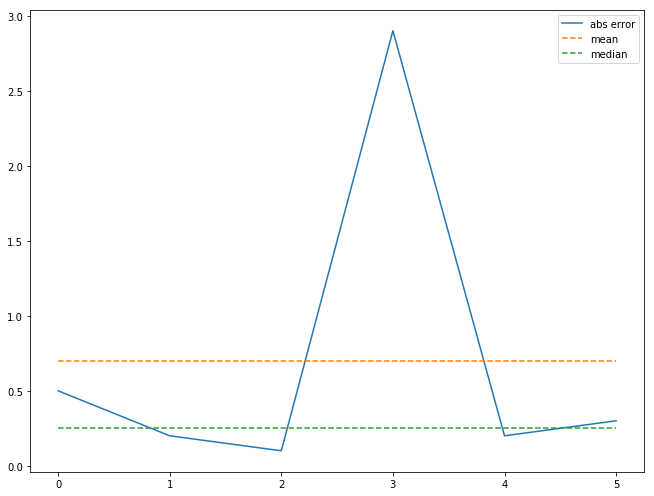

In [5]:
fig,ax = plt.subplots(figsize=(6,4))
fig.set_size_inches(11.0, 8.5)
ax.plot(range(n), np.abs(y-y_pred), label='abs error')
ax.plot([0, n-1], [mean_error]*2, '--', label='mean')
ax.plot([0, n-1], [median_error]*2, '--', label='median')
_ = ax.legend()

## Model persistence

Goal: storing a scikit-learn model for future use without having to retrain!

There are two methods that can be used:

- **`pickle`**: using Python’s built-in persistence model; can pickle to both disk and string
- **`joblib`**: similar to pickle only more efficient on objects that carry large `numpy` arrays; can only pickle to disk

In [6]:
# use joblib to store on disk
from sklearn import datasets
from sklearn import svm
from sklearn.externals import joblib

! mkdir '../output'

clf = svm.SVC()
X, y = convert_to_pandas(datasets.load_iris())
clf.fit(X, y)

joblib.dump(clf, filename='../output/iris_svc.pkl')
clf_j = joblib.load(filename='../output/iris_svc.pkl')
print("prediction with reloaded clf: {}".format(clf_j.predict(X.iloc[[0]])))

mkdir: ../output: File exists
prediction with reloaded clf: ['setosa']


### Note on maintainability and security

Please keep in mind that:

- you should never unpickle untrusted data
- models saved in one version of scikit-learn might not load in another version

To rebuild a similar model with future versions of scikit-learn, all metadata should be saved along the pickled model:

- training data
- python source code used to generate the model
- versions of scikit-learn and its dependencies
- cross-validation score obtained on the training data (to check if rebuild succeeded!)

# Review 

1. What is the difference between false positive and false negative? 
2. What is the difference between precision and recall? 
3. Can you give an example of a situation where accuracy is less important than either precision or recall? 

# Exercises: [lab 5 - Model evaluation](../labs/lab_05_model_evaluation.ipynb)